In [1]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
dataset_dir = Path('data')
csv_files = dataset_dir.glob('*.csv')

In [3]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [4]:
path = dataset_dir / f'motion_data_user1_scene1.csv'

In [7]:
csv = pd.read_csv(path)
csv = csv[using_columns]

In [8]:
csv

,timestamp,acceleration_x,acceleration_y,acceleration_z,angular_vec_x,angular_vec_y,angular_vec_z,input_orientation_x,input_orientation_y,input_orientation_z,input_orientation_w,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,997374745192,0.000000,0.000000,0.000000,-0.151846,0.183652,0.064512,-0.076630,-0.040224,0.015870,0.996121,-0.077837,-0.152083,0.037790
1,997506692772,0.404632,9.653716,2.166819,0.027138,0.352251,0.084671,-0.091854,0.060038,0.015855,0.993834,0.122581,-0.185580,0.020486
2,997511792577,0.727860,9.416683,2.200339,-0.003406,0.339423,-0.002072,-0.091571,0.067269,0.014970,0.993411,0.136841,-0.185031,0.017423
3,997518257556,0.588992,9.371192,2.229070,-0.005849,0.328427,0.021141,-0.091586,0.070036,0.015171,0.993215,0.142403,-0.185139,0.017307
4,997530538849,0.502798,9.454991,2.267378,-0.010125,0.332704,0.039467,-0.091817,0.072951,0.016240,0.992967,0.148428,-0.185812,0.018856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,1261231477198,-0.256187,9.478934,-2.554691,0.031414,0.016886,-0.002072,0.144229,0.003863,-0.022062,0.989291,0.014021,0.289840,-0.042550
21468,1261245585752,-0.237033,9.447808,-2.588211,0.033246,0.019330,-0.004516,0.144372,0.004321,-0.022014,0.989269,0.014920,0.290146,-0.042320
21469,1261255795567,-0.251399,9.462174,-2.590605,0.034468,0.024827,-0.009402,0.144634,0.004657,-0.022233,0.989224,0.015659,0.290695,-0.042652
21470,1261266306048,-0.237033,9.440625,-2.588211,0.033857,0.027271,-0.009402,0.145044,0.004697,-0.022285,0.989163,0.015773,0.291528,-0.042737


In [72]:
def interpolation(x, xt, y, yt, t):
    if xt == t:
        return x
    if yt == t:
        return y
    return x + (t - xt) / (yt - xt) * (y - x)

In [114]:
rows = {col: [float(csv[col][0])] for col in using_columns}

dt = 11760000
nt = rows['timestamp'][0] + dt
ni = 1

while True:
    if ni >= len(csv) - 2:
        break
    
    for i in range(ni, len(csv)):
        if csv['timestamp'][i] > nt:
            for col in using_columns:
                rows[col].append(interpolation(csv[col][i-1], csv['timestamp'][i-1], csv[col][i], csv['timestamp'][i], nt))
            break
    
    nt += dt
    ni = i - 1

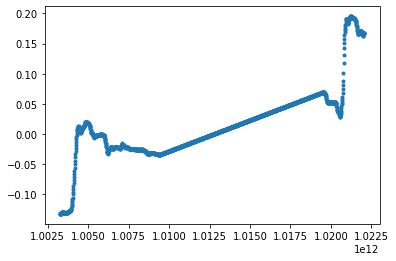

In [129]:
plt.scatter(rows['timestamp'][500:2100], rows['input_orientation_x'][500:2100], marker='.')

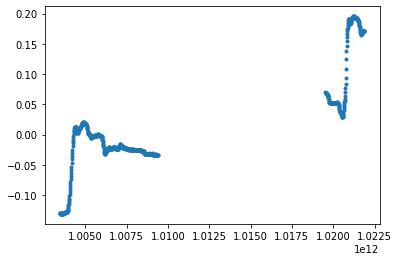

In [124]:
plt.scatter(csv['timestamp'][500:1200], csv['input_orientation_x'][500:1200], marker='.')